# Notebook for calculating MI and TE

In [1]:
import numpy as np
import dat2mat
import MI_for_Lorenz as mi
import module_TE as mTE
from scipy.io import loadmat
import time
import matplotlib as mpl
mpl.use('nbagg')
from mpl_toolkits.mplot3d import Axes3D
import time
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


## Check our raw data, only len(zebrapos1) = 2 is correct

In [2]:
zebrapos1 = pickle.load(open("./RawData/zebrapos.dat","rb"))
len(zebrapos1)

2

In [3]:
## When len(zebrapos1) > 2, check here for the incorrect number of raw data
for i in zebrapos1:
    print(i[0][[0,-1]])

[1.0000e+00 1.7984e+04]
[1.0000e+00 1.7984e+04]


## Plot some useful figures

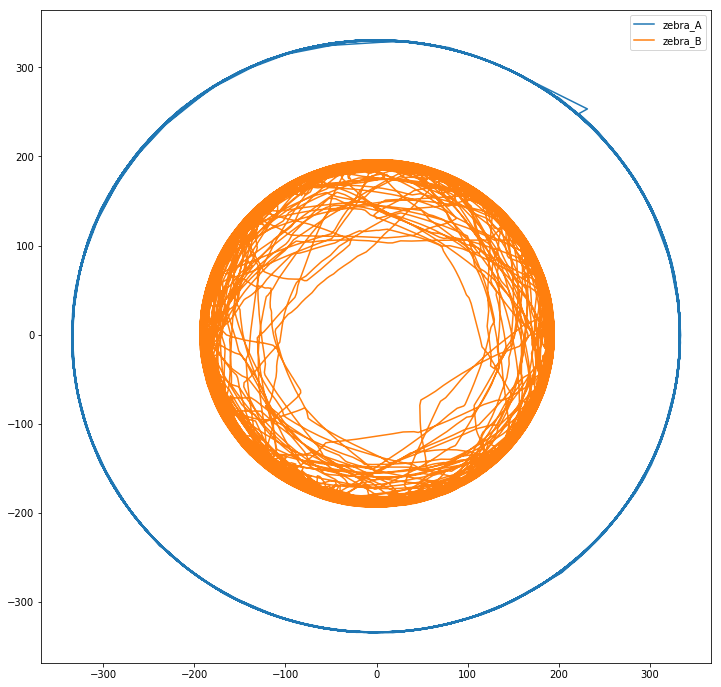

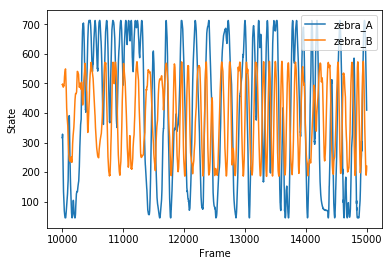

In [4]:
center = [379.5, 380]
NUMofStates = 40
dat2mat.dat2mat(center, NUMofStates)

In [5]:
mat = loadmat('./fish_state(40states).mat')

A = mat['zebrang'][0]
B = mat['zebrang'][1]

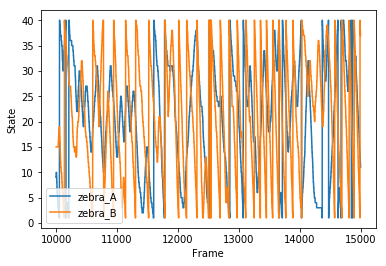

In [6]:
plt.figure()
plt.plot(np.arange(10000,15000), A[10000:15000], label='zebra_A')
plt.plot(np.arange(10000,15000), B[10000:15000], label='zebra_B')
plt.legend()
plt.xlabel('Frame')
plt.ylabel('State')
plt.show()
plt.savefig('1D_Traces_States.jpg')

## Calculate MI

In [7]:
dms = range(-499,500,1)
mi_AA = [mi.mi_quick(A,A,d,NUMofStates) for d in dms]
mi_AB = [mi.mi_quick(A,B,d,NUMofStates) for d in dms]
mi_BB = [mi.mi_quick(B,B,d,NUMofStates) for d in dms]

In [8]:
mi_BA = [mi.mi_quick(B,A,d,NUMofStates) for d in dms]

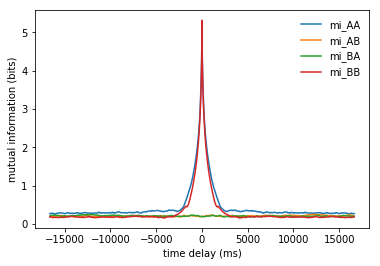

In [9]:
dms_t = np.arange(-499*33.33,500*33.33,1*33.33)
f,a = plt.subplots()
a.plot(dms_t,mi_AA,label='mi_AA')
a.plot(dms_t,mi_AB,label='mi_AB')
a.plot(dms_t,mi_BA,label='mi_BA')
a.plot(dms_t,mi_BB,label='mi_BB')
#a.set_xlim([-30,30])
a.legend(frameon=False)
a.set_ylabel('mutual information (bits)')
a.set_xlabel('time delay (ms)')
plt.show()
plt.savefig('mi.jpg')

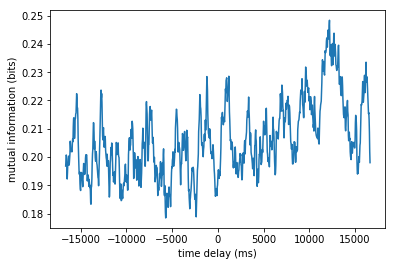

In [10]:
plt.figure()
plt.plot(dms_t,mi_AB,label='mi_AB')
a.legend(frameon=False)
plt.ylabel('mutual information (bits)')
plt.xlabel('time delay (ms)')
plt.show()
plt.savefig('mi_AB.jpg')

## Get history length and tau

In [12]:
tau = dms[np.argmax(mi_AB)] - dms[np.argmax(mi_AA)]
tau

366

In [15]:
A_hist_len = abs(dms[np.argmax(mi_AA)] - dms[np.argmin(np.abs(mi_AA-max(mi_AA)/2))])
A_hist_len

9

In [16]:
B_hist_len = abs(dms[np.argmax(mi_BB)] - dms[np.argmin(np.abs(mi_BB-max(mi_BB)/2))])
B_hist_len

7

## Calculate TE

In [17]:
x1, x2, y = mi.build_x1_x2_y(A, B, A_hist_len, B_hist_len, tau)

tau_y =  366


In [18]:
m1 = mi.MI(y,x1)
print("MI(x1;y) = ", m1)
m2 = mi.MI(y,x2)
print("MI(x2;y) = ", m2)
cm1 = mi.cond_MI(x1, x2, y)
print("MI(x1;y|x2) = ", cm1)
cm2 = mi.cond_MI(x2, x1, y)
print("MI(x2;y|x1) = ", cm2)

MI(x1;y) =  4.791381668078265
MI(x2;y) =  2.005774417818804
MI(x1;y|x2) =  3.2444508197758966
MI(x2;y|x1) =  0.4588435695164952


In [19]:
te_BA = mTE.transfer_entropy(A_hist_len, B_hist_len, 0, tau, A, B)
print("TE(B->A) = ", te_BA)

366
3169 17609 x%:  0.17996479073201205
17018 17609 xy%:  0.9664376171276052
TE(B->A) =  0.45884356951651545


In [21]:
#####################################################

In [23]:
x1, x2, y = mi.build_x1_x2_y(B, A, B_hist_len, A_hist_len, tau)

m1 = mi.MI(y,x1)
print("MI(x1;y) = ", m1)
m2 = mi.MI(y,x2)
print("MI(x2;y) = ", m2)
cm1 = mi.cond_MI(x1, x2, y)
print("MI(x1;y|x2) = ", cm1)
cm2 = mi.cond_MI(x2, x1, y)
print("MI(x2;y|x1) = ", cm2)

te_AB = mTE.transfer_entropy(B_hist_len, A_hist_len, 0, tau, B, A)
print("TE(A->B) = ", te_AB)

tau_y =  366
MI(x1;y) =  4.692033209236206
MI(x2;y) =  2.459928273149659
MI(x1;y|x2) =  2.83565958047337
MI(x2;y|x1) =  0.6035546443869064
366
2148 17611 x%:  0.12196922378059168
17141 17611 xy%:  0.9733121344614162
TE(A->B) =  0.6035546443868918
